In [144]:
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from matplotlib.pyplot import figure

In [87]:
s = np.round_(np.random.uniform(0.01, 1, 10), decimals=2)
s

array([0.5 , 0.91, 0.9 , 0.82, 0.85, 0.79, 0.89, 0.04, 0.66, 0.21])

In [88]:
N=1000
round_t = list(range(1,N+1))
lower, upper = 0, 1

a1 = scipy.stats.truncnorm.rvs((lower-0)/s[0],(upper-0)/s[0],loc=0,scale=s[0],size=N)          #mu, sigma = 0.0, ran
a2 = scipy.stats.truncnorm.rvs((lower-0.1)/s[1],(upper-0.1)/s[1],loc=0.1,scale=s[1],size=N)    #mu, sigma = 0.1, ran
a3 = scipy.stats.truncnorm.rvs((lower-0.2)/s[2],(upper-0.2)/s[2],loc=0.2,scale=s[2],size=N)    #mu, sigma = 0.2, ran
a4 = scipy.stats.truncnorm.rvs((lower-0.3)/s[3],(upper-0.3)/s[3],loc=0.3,scale=s[3],size=N)    #mu, sigma = 0.3, ran
a5 = scipy.stats.truncnorm.rvs((lower-0.4)/s[4],(upper-0.4)/s[4],loc=0.4,scale=s[4],size=N)    #mu, sigma = 0.4, ran
a6 = scipy.stats.truncnorm.rvs((lower-0.5)/s[5],(upper-0.5)/s[5],loc=0.5,scale=s[5],size=N)    #mu, sigma = 0.5, ran
a7 = scipy.stats.truncnorm.rvs((lower-0.6)/s[6],(upper-0.6)/s[6],loc=0.6,scale=s[6],size=N)    #mu, sigma = 0.6, ran
a8 = scipy.stats.truncnorm.rvs((lower-0.7)/s[7],(upper-0.7)/s[7],loc=0.7,scale=s[7],size=N)    #mu, sigma = 0.7, ran
a9 = scipy.stats.truncnorm.rvs((lower-0.8)/s[8],(upper-0.8)/s[8],loc=0.8,scale=s[8],size=N)    #mu, sigma = 0.8, ran
a10 = scipy.stats.truncnorm.rvs((lower-0.9)/s[9],(upper-0.9)/s[9],loc=0.9,scale=s[9],size=N)   #mu, sigma = 0.9, ran

df = pd.DataFrame({"round":round_t, "arm1":a1,"arm2":a2,"arm3":a3,"arm4":a4,"arm5":a5,"arm6":a6,"arm7":a7,"arm8":a8,"arm9":a9,"arm10":a10})
df.head() #.head() just shows first 5 rows

,round,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,arm9,arm10
0,1,0.209421,0.932188,0.398000,0.685312,0.726873,0.939960,0.047775,0.689492,0.036028,0.578531
1,2,0.275881,0.464951,0.324978,0.773546,0.002113,0.748151,0.383163,0.683434,0.836811,0.907527
2,3,0.256143,0.983893,0.215039,0.198314,0.255343,0.957247,0.384456,0.646623,0.543592,0.672722
3,4,0.134960,0.682767,0.623785,0.493841,0.788148,0.860455,0.669991,0.680875,0.900057,0.603718
4,5,0.652856,0.577864,0.006951,0.161430,0.395597,0.708243,0.424971,0.691223,0.731164,0.971067


Text(0.5, 1.0, 'Distribution of Rewards for Each Arm')

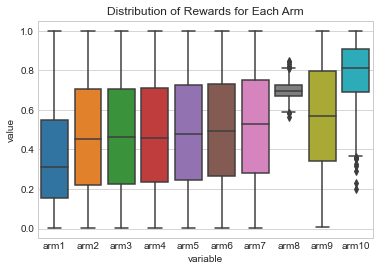

In [89]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10']]))
plt.title("Distribution of Rewards for Each Arm")

In [90]:
#implementing UCB, 1000 runs
#CMAB for 2 arms being selected
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round
    temp_UCB_Values = np.zeros(k)
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt((3/2)*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a]
        
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    N[arm1_selected] += 1
    N[arm2_selected] += 1
    reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
    rewardSum[arm1_selected] += df.values[t, arm1_selected+1]
    rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

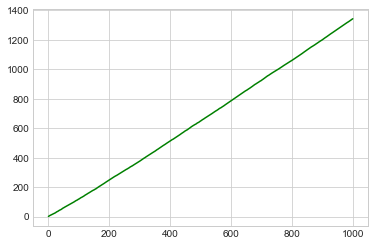

In [91]:
reward_arr1 = UCB_cumu_reward

plt.plot(reward_arr1,color = 'g')
plt.show()

In [92]:
#implementing UCB, 1000 runs
#CMAB for 2 arms being selected
#factor 3/2 replaced with 1
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round
    temp_UCB_Values = np.zeros(k)
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a]
        
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    N[arm1_selected] += 1
    N[arm2_selected] += 1
    reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
    rewardSum[arm1_selected] += df.values[t, arm1_selected+1]
    rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

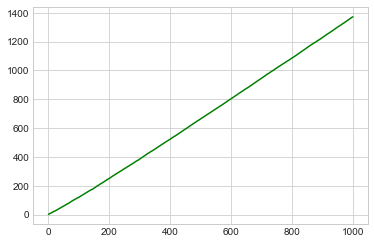

In [93]:
reward_arr2 = UCB_cumu_reward

plt.plot(reward_arr2,color = 'g')
plt.show()

In [94]:
#implementing UCB, 1000 runs
#CMAB for 2 arms being selected
#factor 3/2 replaced by 3
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max 
    temp_UCB_Values = np.zeros(k)
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(3*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a]
        
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    N[arm1_selected] += 1
    N[arm2_selected] += 1
    reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
    rewardSum[arm1_selected] += df.values[t, arm1_selected+1]
    rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

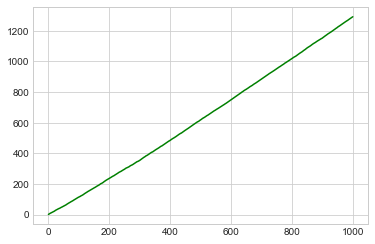

In [95]:
reward_arr3 = UCB_cumu_reward

plt.plot(reward_arr3,color = 'g')
plt.show()

In [96]:
#implementing UCB, 1000 runs
#CMAB for 2 arms being selected
#ln(t) replaced by t
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max 
    temp_UCB_Values = np.zeros(k)
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(3/2*(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a]
    
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    N[arm1_selected] += 1 #will need loop here to do this K times
    N[arm2_selected] += 1
    reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
    rewardSum[arm1_selected] += df.values[t, arm1_selected+1]  #will need loop here to do this K times
    rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

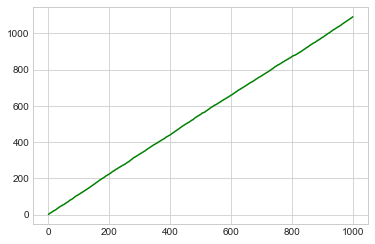

In [97]:
reward_arr4 = UCB_cumu_reward

plt.plot(reward_arr4,color = 'g')
plt.show()

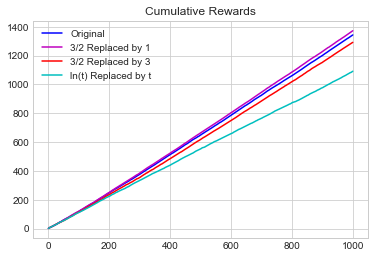

In [98]:
#The 3 plots above all on same set of axes
plt.plot(reward_arr1, label = "Original", color = "b")
plt.plot(reward_arr2, label = "3/2 Replaced by 1", color = 'm')
plt.plot(reward_arr3, label = "3/2 Replaced by 3", color = 'r')
plt.plot(reward_arr4, label = "ln(t) Replaced by t", color = 'c')
plt.title("Cumulative Rewards")
plt.legend()
plt.show()

In [136]:
#Record 2 things for every 20 runs in time sequence
#i.e. 1. selection distribution of each arm; 2. sum of returns of these 20 runs
#so that you have 50 sets of records
#implementing UCB, 1000 runs
#CMAB for 2 arms being selected
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for i in range(1):
    for t in range(20):
        UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max 
        temp_UCB_Values = np.zeros(k)
        arm_selected = 0
        for a in range(k):
            if (N[a] > 0):
                #calculate UCB below
                mu = rewardSum[a]/N[a]
                ucb_value = mu + math.sqrt((3/2)*math.log(t)/N[a]) 
                UCB_Values[a] = ucb_value
            elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
                UCB_Values[a] = 1e500 #infinity
            temp_UCB_Values[a] = UCB_Values[a]

        arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
        temp_UCB_Values[arm1_selected] = 0
        arm2_selected = np.argmax(temp_UCB_Values)

        #update Values as of round t
        N[arm1_selected] += 1
        N[arm2_selected] += 1
        reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
        rewardSum[arm1_selected] += df.values[t, arm1_selected+1]
        rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
        hist_UCB_rewards.append(reward)
        UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
        UCB_total_reward = sum(hist_UCB_rewards)
    

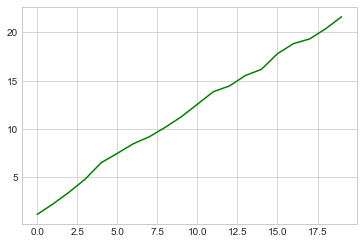

In [137]:
reward_arr = UCB_cumu_reward

plt.plot(reward_arr,color = 'g')
plt.show()

In [138]:
for i in range(49):
    for t in range(1,21):
        for a in range(k):
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt((3/2)*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
            temp_UCB_Values[a] = UCB_Values[a]            

        arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
        temp_UCB_Values[arm1_selected] = 0
        arm2_selected = np.argmax(temp_UCB_Values)

        #update Values as of round t
        N[arm1_selected] += 1
        N[arm2_selected] += 1
        reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
        rewardSum[arm1_selected] += df.values[t, arm1_selected+1]
        rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
        hist_UCB_rewards.append(reward)
        UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
        UCB_total_reward = sum(hist_UCB_rewards)

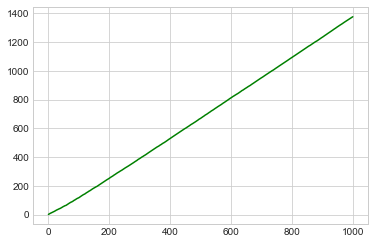

In [139]:
reward_arr = UCB_cumu_reward

plt.plot(reward_arr,color = 'g')
plt.show()

In [145]:
#stacked bar plot attempt
figure(figsize=(9,6))
plt.bar(a1, color='cyan', label='A')
plt.bar(a2, bottom=a1, color='green', label='B')
plt.bar(a3, bottom=a1+a2, color='red', label='C')
plt.bar(a4, bottom=a1+a2+a3, color='yellow', label='D')

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 648x432 with 0 Axes>

In [151]:
rewardSum[0], rewardSum[1], rewardSum[2], rewardSum[3], rewardSum[9]

(7.067241188649765,
 126.82720352595265,
 26.606157845736153,
 2.660647692110857,
 728.1099290535948)

In [149]:
rewardSum[9]

728.1099290535948